In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
from itertools import cycle
from scipy import interp

#import sklearn.model_selection 
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, cross_validate

from sklearn.feature_selection import RFE

from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, precision_recall_curve, roc_curve, auc, confusion_matrix, make_scorer, accuracy_score, precision_score, recall_score, f1_score

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
train_data=pd.read_csv('Training Data.csv')
test_data=pd.read_csv('Test Data.csv')

In [4]:
train_data.head()

,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
0,1,19,M,7,0,0,0,0,0,0,No
1,2,24,F,59,0,0,0,0,0,0,No
2,3,4,F,43,0,0,0,0,0,0,No
3,4,38,M,66,0,0,0,0,0,1,No
4,5,46,F,98,0,0,0,0,0,1,No


In [5]:
train_data.columns

Index(['patient_id', 'Age', 'Gender', 'Prescription_period', 'Diabetes',
       'Alcoholism', 'HyperTension', 'Smokes', 'Tuberculosis', 'Sms_Reminder',
       'Adherence'],
      dtype='object')

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180212 entries, 0 to 180211
Data columns (total 11 columns):
patient_id             180212 non-null int64
Age                    180212 non-null int64
Gender                 180212 non-null object
Prescription_period    180212 non-null int64
Diabetes               180212 non-null int64
Alcoholism             180212 non-null int64
HyperTension           180212 non-null int64
Smokes                 180212 non-null int64
Tuberculosis           180212 non-null int64
Sms_Reminder           180212 non-null int64
Adherence              180212 non-null object
dtypes: int64(9), object(2)
memory usage: 15.1+ MB


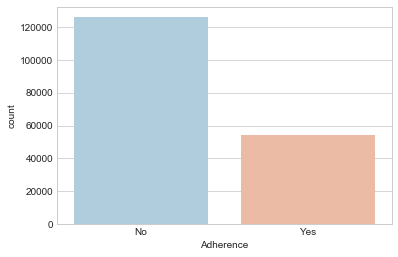

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Adherence',data=train_data,palette='RdBu_r')

In [8]:
#convert objects to category using Label Encoder
label = LabelEncoder()

def Label_Encoding(data,var_mod):
    for i in var_mod:
        data[i] = label.fit_transform(data[i])
    return data    

In [9]:
train_data=Label_Encoding(train_data,['Gender','Adherence'])
test_data=Label_Encoding(test_data,['Gender'])

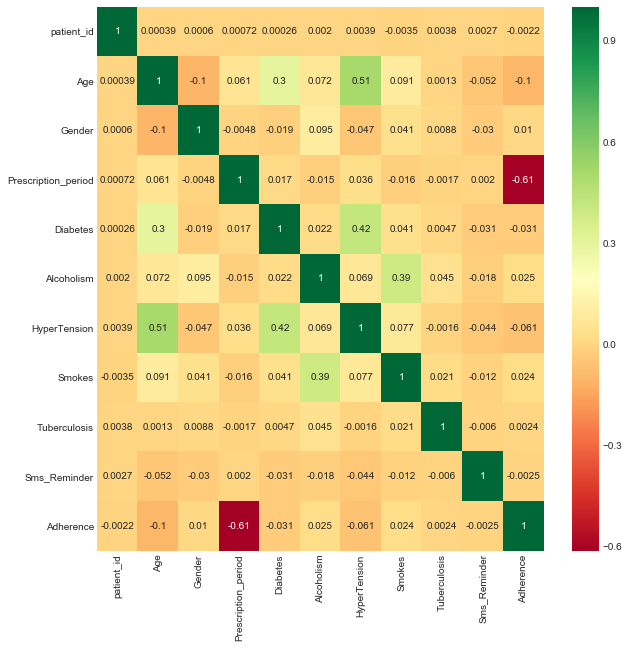

In [10]:
corrmat = train_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (10,10))
#plot heat map
g = sns.heatmap(train_data[top_corr_features].corr(),annot = True, cmap="RdYlGn")

#  Test-train split

In [11]:
X=train_data[['Age', 'Gender', 'Prescription_period', 'Diabetes',
       'Alcoholism', 'HyperTension', 'Smokes', 'Tuberculosis', 'Sms_Reminder']]
y=train_data['Adherence']
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0, test_size = 0.3)

[1.16050735e-01 1.98998940e-03 8.70225997e-01 1.30920069e-03
 9.71813153e-04 3.74431744e-03 1.23371707e-03 1.23037343e-04
 4.35119368e-03]


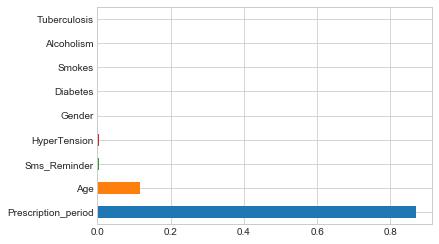

Prescription_period    0.870226
Age                    0.116051
Sms_Reminder           0.004351
HyperTension           0.003744
Gender                 0.001990
Diabetes               0.001309
Smokes                 0.001234
Alcoholism             0.000972
Tuberculosis           0.000123
dtype: float64


In [12]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show()

#Create a series with feature importances:
cols=['Age', 'Gender', 'Prescription_period', 'Diabetes',
       'Alcoholism', 'HyperTension', 'Smokes', 'Tuberculosis', 'Sms_Reminder']
featimp = pd.Series(model.feature_importances_, index=cols).sort_values(ascending=False)
print (featimp)

# Cross-validate

In [13]:
# Cross Validation to test and anticipate overfitting problem
def crossvalidate(clf, X,y):
    scores1 = cross_val_score(clf, X, y, cv = 10, scoring = 'precision')
    scores2 = cross_val_score(clf, X, y, cv = 10, scoring = 'recall')
    scores3 = cross_val_score(clf, X, y, cv = 10, scoring = 'roc_auc')
    # The mean score and standard deviation of the score estimate
    print("Cross Validation Precision: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std()))
    print("Cross Validation Recall: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std()))
    print("Cross Validation roc_auc: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std()))
    # Create and print confusion matrix

In [14]:
print("LR")
lr = LogisticRegression()
crossvalidate(lr, X, y)


LR
Cross Validation Precision: 0.79 (+/- 0.00)
Cross Validation Recall: 0.82 (+/- 0.01)
Cross Validation roc_auc: 0.90 (+/- 0.00)


# Cross-validate Imbalanced Data

In [15]:
def pr_auc_score(clf, X, y):
    '''
        This function computes area under the precision-recall curve. 
    '''
    precisions, recalls,_ = precision_recall_curve(y, clf.predict_proba(X)[:,1], pos_label = 1)
    
    return auc(recalls, precisions)

In [16]:
def imbalanced_cross_validation_score(clf, X, y, cv, scoring, sampler):
    '''
        This function computes the cross-validation score of a given 
        classifier using a choice of sampling function to mitigate 
        the class imbalance, and stratified k-fold sampling.
        
        The first five arguments are the same as 
        sklearn.model_selection.cross_val_score.
        
        - clf.predict_proba(x) returns class label probabilities
        - clf.fit(x,y) trains the model
        
        - x = data
        
        - y = labels
        
        - cv = the number of folds in the cross validation
        
        - scoring(classifier, x, y) returns a float
        
        The last argument is a choice of random sampler: an object 
        similar to the sampler objects available from the python 
        package imbalanced-learn. In particular, this 
        object needs to have the method:
        
        sampler.fit_sample(x,y)
        
        See http://contrib.scikit-learn.org/imbalanced-learn/
        for more details and examples of other sampling objects 
        available.  
    
    '''
    
    cv_score = 0.
    train_score = 0.
    test_score = 0.
    
    # stratified k-fold creates folds with the same ratio of positive and negative samples as the entire dataset.
    skf = StratifiedKFold(n_splits = cv, random_state = 0, shuffle = False)
    
    for train_idx, test_idx in skf.split(X, y):

        xfold_train_sampled, yfold_train_sampled = sampler.fit_sample(X.iloc[train_idx],y.iloc[train_idx])
        clf.fit(xfold_train_sampled, yfold_train_sampled)
        
        #clf.fit(X.iloc[train_idx], y.iloc[train_idx])
        
        train_score = scoring(clf, xfold_train_sampled, yfold_train_sampled)
        
        #train_score = scoring(clf, X.iloc[train_idx], y.iloc[train_idx])
        
        test_score  = scoring(clf, X.iloc[test_idx], y.iloc[test_idx])
        
        print("Train AUPRC: %.2f Test AUPRC: %.2f"%(train_score,test_score))

        cv_score += test_score
        
    return cv_score/cv

In [17]:
cv = 2

lr_model = LogisticRegression() # C = 1e10, class_weight = "balanced"

RFModel = RandomForestClassifier(n_estimators = 180) #n_estimators = 180
ETModel = ExtraTreesClassifier()
ABModel   = AdaBoostClassifier()
XGBModel = XGBClassifier()

In [18]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler

In [1]:
# With Random Over-sampling
print('Random Forest Classifier')
print("Random over-sampling")
score = imbalanced_cross_validation_score(RFModel, X, y, cv, pr_auc_score, RandomOverSampler())
print("Cross-validated AUPRC score: %.2f"%score)

# With Random Under Sampling
print("Random under-sampling")
score = imbalanced_cross_validation_score(RFModel, X, y, cv, pr_auc_score, RandomUnderSampler())
print("Cross-validated AUPRC score: %.2f"%score)

print('Logistic Regression')
# With Random Over-sampling
print("Random over-sampling")
score = imbalanced_cross_validation_score(lr_model, X, y, cv, pr_auc_score, RandomOverSampler())
print("Cross-validated AUPRC score: %.2f"%score)

# With Random Under Sampling
print("Random under-sampling")
score = imbalanced_cross_validation_score(lr_model, X, y, cv, pr_auc_score, RandomUnderSampler())
print("Cross-validated AUPRC score: %.2f"%score)



# Exp-1 : Logistic Regression using traditional test-train split

True negatives :  30131 
False positives :  7708 
False negatives :  1395 
True positives :  14830
Accuracy: 0.8316254809115122
(0.8068753156890726, 0.8551581998680566, 0.8169646620893345, None)
Overall AUC: 0.855
              precision    recall  f1-score   support

           0       0.96      0.80      0.87     37839
           1       0.66      0.91      0.77     16225

    accuracy                           0.83     54064
   macro avg       0.81      0.86      0.82     54064
weighted avg       0.87      0.83      0.84     54064



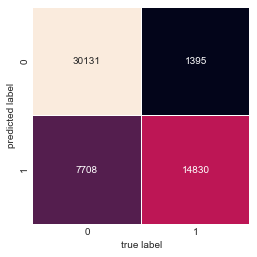

In [19]:
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(class_weight = 'balanced')  #class_weight = 'balanced', C = 1e10
logisticRegr.fit(train_X, train_y)
pred_y = logisticRegr.predict(val_X)

# Confusion matrix
cm = metrics.confusion_matrix(val_y, pred_y)
#print(cm)
tn, fp, fn, tp = cm.ravel()
print("True negatives : ", tn, "\n" "False positives : ", fp, "\n" "False negatives : ", fn, "\n" "True positives : ", tp)

#Plotting confusion matrices
mat = confusion_matrix(val_y, pred_y)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False,  linewidths = .5)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Accuracies, f_score, roc_auc_score
print("Accuracy:",metrics.accuracy_score(val_y, pred_y))
print(precision_recall_fscore_support(val_y, pred_y, average = 'macro'))

score = roc_auc_score(val_y, pred_y)
print("Overall AUC: {:.3f}" .format(score))

print(metrics.classification_report(val_y, pred_y))

# Logistic Regression using K-Fold

In [20]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

kfold = KFold(n_splits = 10, random_state = 42)
model = LogisticRegression() 

results = cross_validate(estimator = model,
                                X = X,
                                y = y,
                                cv = kfold,
                                scoring = scoring)

print(results)

{'fit_time': array([0.85351086, 0.84951687, 0.86150765, 0.94446015, 0.88749385,
       0.87549996, 0.92247605, 0.71459222, 0.71357322, 0.71459079]), 'score_time': array([0.04697323, 0.04697347, 0.05097246, 0.04897237, 0.04397321,
       0.04497361, 0.03897715, 0.04099774, 0.03597975, 0.03997517]), 'test_accuracy': array([0.87936966, 0.88197758, 0.87775373, 0.88019533, 0.88013984,
       0.88063925, 0.88302536, 0.87875257, 0.87808668, 0.87980689]), 'test_precision': array([0.79370134, 0.78793164, 0.78997905, 0.78223696, 0.78604322,
       0.79460618, 0.79792189, 0.78100264, 0.78730103, 0.7911733 ]), 'test_recall': array([0.81652712, 0.83219746, 0.81900452, 0.83110864, 0.82337662,
       0.81633028, 0.81965403, 0.82527881, 0.82105071, 0.81485588]), 'test_f1_score': array([0.80495245, 0.80945982, 0.80422998, 0.80593258, 0.80427691,
       0.80532175, 0.80864198, 0.8025305 , 0.80382177, 0.80283998])}


# Logistic Regression using Stratified K-Fold

In [21]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

kfold = StratifiedKFold(n_splits = 10, random_state = 42)
model = LogisticRegression() 

results = cross_validate(estimator = model,
                                X = X, 
                                y = y,  
                                cv = kfold,
                                scoring = scoring)

print(results)

{'fit_time': array([0.70159888, 0.75257134, 0.72358775, 0.72558498, 0.73757792,
       0.71859026, 0.74657583, 0.72159028, 0.71259236, 0.7215879 ]), 'score_time': array([0.03997588, 0.03497791, 0.03597808, 0.03997684, 0.03897882,
       0.04497218, 0.03797817, 0.03897738, 0.03597617, 0.04697394]), 'test_accuracy': array([0.87970259, 0.88225502, 0.87858609, 0.87930747, 0.88041729,
       0.88080573, 0.8828034 , 0.87841962, 0.87864158, 0.87947395]), 'test_precision': array([0.79137716, 0.78848495, 0.78622997, 0.78362878, 0.78867792,
       0.79431229, 0.79795809, 0.78371768, 0.7857645 , 0.79206151]), 'test_recall': array([0.81669425, 0.83342526, 0.82092296, 0.82901269, 0.82478397,
       0.81651039, 0.81908439, 0.82478397, 0.82202611, 0.81448796]), 'test_f1_score': array([0.80383641, 0.8103325 , 0.80320201, 0.80568212, 0.80632695,
       0.80525839, 0.80838323, 0.8037266 , 0.80348639, 0.8031182 ])}


# Random Forests Classifier using traditional test-train split

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Sorted Feature Importance:
[(0.8498709898155477, 'Prescription_period'), (0.12781628239475154, 'Age'), (0.0068021804670660374, 'Sms_Reminder'), (0.005359122444600978, 'Gender'), (0.0038502223022409275, 'HyperTension'), (0.002496805063129388, 'Diabetes'), (0.0020669534469308667, 'Smokes'), (0.0015937428779201534, 'Alcoholism'), (0.00014370118781234005, 'Tuberculosis')]
[[    0 37839]
 [    1 16225]]
[[    0 36857]
 [    1 17207]]
Accuracy: 86.97%
[[33826  4013]
 [ 3031 13194]]
True negatives :  33826 
False positives :  4013 
False negatives :  3031 
True positives :  13194
(0.8422721041905374, 0.8535674612952429, 0.8475007113783087, None)
Overall AUC: 0.854
              precision    recall  f1-score   support

           0       0.92      0.89      0.91     37839
           1       0.77      0.81      0.79     16225

    accuracy                           0.87     54064
   macro avg       0.84      0.85      0.85     54064
weighted avg       0.87      0.87      0.87     54064



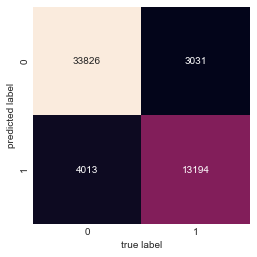

In [24]:
# clf = RandomForestClassifier(n_estimators = 180)

#Feature importance in Random Forests
#------------------------------------
clf.fit(train_X, train_y)
importances = clf.feature_importances_
print ("Sorted Feature Importance:")
sorted_feature_importance = sorted(zip(importances, list(train_X)), reverse = True)
print (sorted_feature_importance)
#-----------------------------

pred_y = clf.predict(val_X)

unique, counts = np.unique(val_y, return_counts = True)
print(np.asarray((unique, counts)).T)

unique, counts = np.unique(pred_y, return_counts = True)
print(np.asarray((unique, counts)).T)

#Classification results
accuracy = metrics.accuracy_score(val_y, pred_y)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

cm = metrics.confusion_matrix(val_y, pred_y)
print(cm)
tn, fp, fn, tp = cm.ravel()
print("True negatives : ", tn, "\n" "False positives : ", fp, "\n" "False negatives : ", fn, "\n" "True positives : ", tp)

#Plotting confusion matrices
mat = confusion_matrix(val_y, pred_y)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(precision_recall_fscore_support(val_y, pred_y, average = 'macro'))  #'weighted' gives higher precision and recall

score = roc_auc_score(val_y, pred_y)
print("Overall AUC: {:.3f}" .format(score))

print(metrics.classification_report(val_y, pred_y))

# Random Forests classifier using KFold

In [25]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

kfold = KFold(n_splits = 10, random_state = 42)
model = RandomForestClassifier(n_estimators = 180) 

results = cross_validate(estimator = model,
                                X = X,
                                y = y,
                                cv = kfold,
                                scoring = scoring)

print(results)

{'fit_time': array([32.52143168, 47.1055305 , 41.56526947, 40.66875958, 37.03085637,
       33.7587266 , 33.11509395, 34.16151404, 39.13165307, 40.45889974]), 'score_time': array([5.36293697, 4.65833902, 4.6123848 , 5.12809277, 4.69032168,
       4.42147303, 4.41149926, 4.41048145, 9.17676091, 5.04411936]), 'test_accuracy': array([0.8719343 , 0.87304406, 0.87148327, 0.87364741, 0.87403585,
       0.87470174, 0.87631097, 0.87092836, 0.87237112, 0.87447977]), 'test_precision': array([0.7784965 , 0.76970634, 0.77254969, 0.76940363, 0.77291812,
       0.77775844, 0.78040245, 0.76519625, 0.77177998, 0.77846535]), 'test_recall': array([0.81052057, 0.8255664 , 0.82316742, 0.82517612, 0.81966605,
       0.82      , 0.82075819, 0.81895911, 0.82415177, 0.81356245]), 'test_f1_score': array([0.79418584, 0.79665837, 0.79705573, 0.79631452, 0.79560598,
       0.79832083, 0.80007176, 0.79116538, 0.79710656, 0.79562703])}


In [27]:
# print("Train precision is: ", np.mean(results['train_precision']))
# print("Train recall is: ", np.mean(results['train_recall']))
# print("Train F1-score is: ", np.mean(results['train_f1_score']))

print("Test precision is: ", np.mean(results['test_precision']))
print("Test recall is: ", np.mean(results['test_recall']))
print("Test F1-score is: ", np.mean(results['test_f1_score']))

Test precision is:  0.7736676745906372
Test recall is:  0.8201528081432743
Test F1-score is:  0.7962111998839767


# Random Forests classifier using Stratified KFold

In [28]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

kfold = StratifiedKFold(n_splits = 10, random_state = 42)
model = RandomForestClassifier(n_estimators = 180) 

results = cross_validate(estimator = model,
                                X = X,
                                y = y,
                                cv = kfold,
                                scoring = scoring)
print(results)

{'fit_time': array([33.11309338, 32.26657438, 32.1446414 , 32.26857376, 32.54042268,
       32.85824037, 39.66434765, 31.52000308, 32.60038686, 31.73788142]), 'score_time': array([4.29654646, 4.26358342, 4.24857712, 4.28155589, 4.33951902,
       4.52143621, 4.23160458, 4.25157309, 4.32452989, 4.22960329]), 'test_accuracy': array([0.87298857, 0.87309955, 0.8724821 , 0.87242661, 0.87436879,
       0.87303701, 0.87703235, 0.86976305, 0.87264858, 0.87342545]), 'test_precision': array([0.77650983, 0.77041867, 0.76933631, 0.76994498, 0.77546417,
       0.77635503, 0.7809939 , 0.76618457, 0.77010309, 0.77848325]), 'test_recall': array([0.81320096, 0.8255194 , 0.82478397, 0.82331311, 0.82165839,
       0.81375253, 0.82349697, 0.8181651 , 0.82404854, 0.81154624]), 'test_f1_score': array([0.79443197, 0.79701784, 0.79609583, 0.79573523, 0.79789323,
       0.794614  , 0.80168248, 0.79132213, 0.79616307, 0.79467099])}


In [29]:
print("Test accuracy is: ", np.mean(results['test_accuracy']))
print("Test precision is: ", np.mean(results['test_precision']))
print("Test recall is: ", np.mean(results['test_recall']))
print("Test F1-score is: ", np.mean(results['test_f1_score']))

Test accuracy is:  0.8731272066582625
Test precision is:  0.7733793786737108
Test recall is:  0.8199485199485199
Test F1-score is:  0.7959626770892955


# lgb Classifier

In [30]:
import lightgbm as lgb

train_data = lgb.Dataset(train_X, label = train_y)
valid_data = lgb.Dataset(val_X, label = val_y)

#Select Hyper-Parameters
params = {'metric' : 'auc',
          'boosting_type' : 'gbdt',
          'objective': 'binary',
          'colsample_bytree' : 0.9234,
          'num_leaves' : 90,
          'max_depth' : -1,
          'n_estimators' : 600,
          'min_child_samples': 5, 
          'min_child_weight': 0.1,
          'reg_alpha': 2,
          'reg_lambda': 1,
          'subsample': 0.855,
          'verbose' : -1,
          'num_threads' : 4
}

#Train model on selected parameters and number of iterations
lgbm = lgb.train(params,
                 train_data,
                 3500,
                 valid_sets = valid_data,
                 early_stopping_rounds = 50,
                 verbose_eval= 50
                )

ModuleNotFoundError: No module named 'lightgbm'

# XGBoost Classifier

Accuracy: 89.36%
[[33850  3989]
 [ 1765 14460]]
True negatives :  33850 
False positives :  3989 
False negatives :  1765 
True positives :  14460
(0.8671122741112971, 0.8928984619003122, 0.8778597972752598, None)
Overall AUC: 0.893
              precision    recall  f1-score   support

           0       0.95      0.89      0.92     37839
           1       0.78      0.89      0.83     16225

    accuracy                           0.89     54064
   macro avg       0.87      0.89      0.88     54064
weighted avg       0.90      0.89      0.90     54064



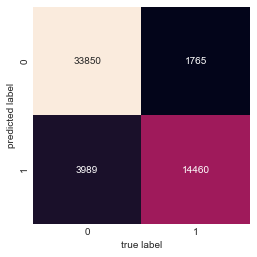

In [31]:
model = XGBClassifier(n_estimators = 225)

#grid_values = {'n_estimators':[100,125,150,175,200,225]}
#clf = GridSearchCV(model, param_grid = grid_values, cv = 5)
#clf.fit(train_X, train_y)

#print(clf.best_params_)
#print(clf.best_score_)

model.fit(train_X, train_y)

# make predictions for test data
pred_y = model.predict(val_X)
#print(np.unique(pred_y))
pred_y = [round(value) for value in pred_y]

# evaluate predictions
accuracy = metrics.accuracy_score(val_y, pred_y)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

cm = metrics.confusion_matrix(val_y, pred_y)
print(cm)
tn, fp, fn, tp = cm.ravel()
print("True negatives : ", tn, "\n" "False positives : ", fp, "\n" "False negatives : ", fn, "\n" "True positives : ", tp)

#Plotting confusion matrices
mat = confusion_matrix(val_y, pred_y)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label');

print(precision_recall_fscore_support(val_y, pred_y, average = 'macro'))  #'weighted' gives higher precision and recall

score = roc_auc_score(val_y, pred_y)
print("Overall AUC: {:.3f}" .format(score))

print(metrics.classification_report(val_y, pred_y))

# Balanced Random Forests Classifier

Accuracy: 89.21%
[[33604  4235]
 [ 1599 14626]]
True negatives :  33604 
False positives :  4235 
False negatives :  1599 
True positives :  14626
Overall AUC: 0.895
(0.8650201648122123, 0.8947634098585968, 0.8769254989351656, None)
              precision    recall  f1-score   support

           0       0.95      0.89      0.92     37839
           1       0.78      0.90      0.83     16225

    accuracy                           0.89     54064
   macro avg       0.87      0.89      0.88     54064
weighted avg       0.90      0.89      0.89     54064



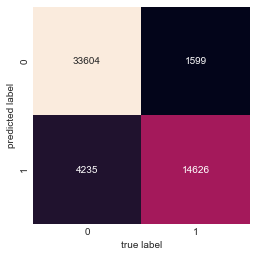

In [32]:
brfc = BalancedRandomForestClassifier(random_state = 42, n_estimators = 180)
brfc.fit(train_X, train_y)
pred_y = brfc.predict(val_X)

# evaluate predictions
accuracy = metrics.accuracy_score(val_y, pred_y)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

cm = metrics.confusion_matrix(val_y, pred_y)
print(cm)
tn, fp, fn, tp = cm.ravel()
print("True negatives : ", tn, "\n" "False positives : ", fp, "\n" "False negatives : ", fn, "\n" "True positives : ", tp)

#Plotting confusion matrices
mat = confusion_matrix(val_y, pred_y)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label');

score = roc_auc_score(val_y, pred_y)
print("Overall AUC: {:.3f}" .format(score))

print(precision_recall_fscore_support(val_y, pred_y, average = 'macro'))

print(metrics.classification_report(val_y, pred_y))

# Balanced Bagging classifier

Accuracy: 86.84%
[[32661  5178]
 [ 1939 14286]]
True negatives :  32661 
False positives :  5178 
False negatives :  1939 
True positives :  14286
Overall AUC: 0.872
(0.838964972238655, 0.8718250632158935, 0.8511673157014995, None)
              precision    recall  f1-score   support

           0       0.94      0.86      0.90     37839
           1       0.73      0.88      0.80     16225

    accuracy                           0.87     54064
   macro avg       0.84      0.87      0.85     54064
weighted avg       0.88      0.87      0.87     54064



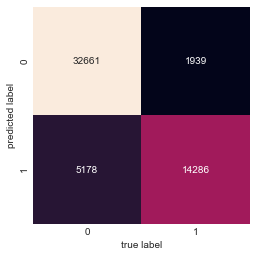

In [33]:
from imblearn.ensemble import BalancedBaggingClassifier

bbc = BalancedBaggingClassifier(random_state = 42, n_estimators = 150)
bbc.fit(train_X, train_y)
pred_y = bbc.predict(val_X)

# evaluate predictions
accuracy = metrics.accuracy_score(val_y, pred_y)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

cm = metrics.confusion_matrix(val_y, pred_y)
print(cm)
tn, fp, fn, tp = cm.ravel()
print("True negatives : ", tn, "\n" "False positives : ", fp, "\n" "False negatives : ", fn, "\n" "True positives : ", tp)

#Plotting confusion matrices
mat = confusion_matrix(val_y, pred_y)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label');

score = roc_auc_score(val_y, pred_y)
print("Overall AUC: {:.3f}" .format(score))

print(precision_recall_fscore_support(val_y, pred_y, average = 'macro'))

print(metrics.classification_report(val_y, pred_y))

# Selecting Features

In [38]:
#Selecting input features and target label
combined_data1 = train_data[cols]


In [39]:

#Selecting features through recursive feature elimination
rfe = RFE(logisticRegr, 9)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

f = fit.get_support(1)
print(f)

combined_data2 = combined_data1[combined_data1.columns[f]]
print(combined_data2.columns.tolist())
#combined_data2.head()
predictors = combined_data2.columns.tolist()
predictors
# X_logr = combined_data1[predictors] #Setting the predictors
# y_logr = combined_data1.HavingFlu  #Setting the target label

# train_X, val_X, train_y, val_y = train_test_split(X_logr, y_logr, random_state = 0, test_size = 0.3)

Num Features: 9
Selected Features: [ True  True  True  True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1]
[0 1 2 3 4 5 6 7 8]
['Age', 'Gender', 'Prescription_period', 'Diabetes', 'Alcoholism', 'HyperTension', 'Smokes', 'Tuberculosis', 'Sms_Reminder']


['Age',
 'Gender',
 'Prescription_period',
 'Diabetes',
 'Alcoholism',
 'HyperTension',
 'Smokes',
 'Tuberculosis',
 'Sms_Reminder']